This Notebook showcases some data analysis done on a text file downloaded from the Web.

In [12]:
#Import all required packages
import requests

#Force utf8 as the character encoding
import codecs 
#numpy is a package for numeric computing
import numpy as np

#nltk is a package for working with text
#pip install nltk
#Also see: http://www.nltk.org/book/
#To download ready-to-use nltk datasets run in your shell: python -m nltk.downloader popular
#You need the nltk.corpus.stopwords.words('english') for this code to run
import nltk

#matplotlib is for plotting and nice visualisations
import matplotlib
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', 10)  # or None
pd.set_option('display.max_rows', 100)  # or 1000
#pd.set_option('display.max_colwidth', None)  # or 199

#Package re is for regular expressions
import re 
%config IPCompleter.greedy=True

import os
#pip install newspaper3k
from newspaper import Article

In [13]:
#Get a text file.
#Get book "Alice's Adventures in Wonderland" from Project Gutenberg, in text format
#Store text content to a file named alice.txt

url='http://www.gutenberg.org/cache/epub/11/pg11.txt'
text_page = requests.get(url).text
with codecs.open("alice.txt", "w", "utf8") as file:
    file.write(text_page)
#Look at the text_page object
#?text_page

#Look at the first 5000 characters of the book
print(text_page[:5000])

﻿The Project Gutenberg eBook of Alice's Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Alice's Adventures in Wonderland


Author: Lewis Carroll

Release date: June 27, 2008 [eBook #11]
                Most recently updated: March 30, 2021

Language: English

Credits: Arthur DiBianca and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***
[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tea

# Example of Descriptive Analysis

In [14]:
#Open the file where we stored the book "Alice's Adventures in Wonderland"
#Load data into object text
with open('alice.txt', 'r') as file:
    text = file.read()

#Example of Descriptive Analysis
#How many chapters does the book have?
#Ignore the first element at index 0 which is the pre-face, 
#not a chapter. See book structure.
chapters = text.split("CHAPTER")[1:]
chapter_lengths = [len(ch) for ch in chapters]

min_chapter_length = len(min(chapters, key=len))
max_chapter_length = len(max(chapters, key=len))

avg_chapter_length = sum(chapter_lengths)/len(chapters)
#Can use numpy for numeric computations such as mean, standard deviation
numpy_avg_chapter_length = np.mean(chapter_lengths)
stdev_chapter_length = np.std(chapter_lengths)

#?nchapters
print("Number of chapters: ", len(chapters))
print("Chapter lengths: ", chapter_lengths)
print("Min chapter length: ", min_chapter_length)
print("Max chapter length: ", max_chapter_length)
print("Avg chapter length: ", avg_chapter_length)
print("Numpy Avg chapter length: ", numpy_avg_chapter_length)
print("Deviation from avg chapter length: ", stdev_chapter_length)


data = []
data.append([len(chapters), min_chapter_length, max_chapter_length, avg_chapter_length, stdev_chapter_length])

#create a new data frame which collects features about this book
df_book_features = pd.DataFrame(data, columns=['number_chapters', 'min_chapter_length', 'max_chapter_length', 'avg_chapter_length', 'stdev_chapter_length'])

print("\ndata frame for book")
print("data frame rows and columns:", df_book_features.shape, "\n")

df_book_features.to_csv("project_gutenberg_books.csv")
df_book_features

Number of chapters:  24
Chapter lengths:  [30, 27, 39, 43, 35, 24, 25, 36, 33, 31, 30, 29, 11549, 10951, 9259, 13882, 12009, 13842, 12702, 13668, 12629, 11409, 10385, 30182]
Min chapter length:  24
Max chapter length:  30182
Avg chapter length:  6785.375
Numpy Avg chapter length:  6785.375
Deviation from avg chapter length:  7689.804206504546

data frame for book
data frame rows and columns: (1, 5) 



,number_chapters,min_chapter_length,max_chapter_length,avg_chapter_length,stdev_chapter_length
0,24,24,30182,6785.375,7689.804207


# Example of Exploratory Analysis

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/georgianaifrim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/georgianaifrim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Number of sentences:  1105
Number of words:  38047

Most frequent top-10 words:  [('said', 457), ('alice', 402), ('little', 127), ('one', 100), ('project', 88), ('like', 84), ('went', 83), ('would', 78), ('queen', 76), ('could', 75)]


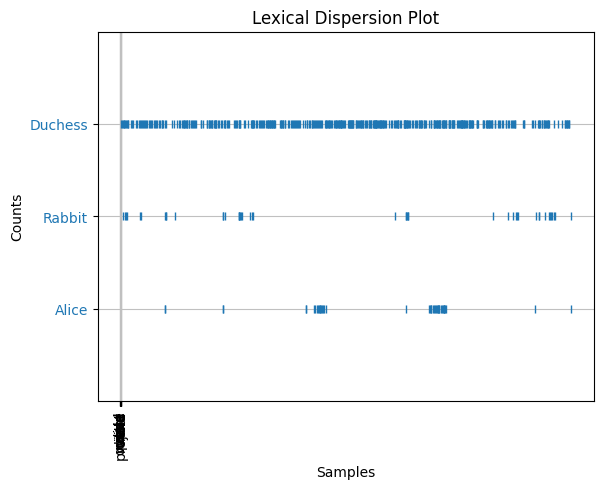

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Samples', ylabel='Counts'>

In [16]:
#Open the file where we stored the book "Alice's Adventures in Wonderland"
#Load data into object text
with open('alice.txt', 'r') as file:
    text = file.read()

#Example of Exploratory Analysis
#Where in the text do given words occur? (visualisation)
#What are the top-20 most frequent words in this book? (summarization)
sentences = nltk.sent_tokenize(text)
words = nltk.word_tokenize(text)
#print(words[:10])
print("Number of sentences: ", len(sentences))
print("Number of words: ", len(words))

#Turn the text into an nltk object Text
alice = nltk.Text(words)
#?alice
#Where in the text do given words occur? (visualisation)
alice.dispersion_plot(["Alice", "Rabbit", "Duchess"])

# Remove all punctuation from word lists - note the use of regular expressions!
#\W Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].
#For more details: https://docs.python.org/3/howto/regex.html
alice = [w for w in alice if not (re.match(r'^\W+$', w) != None)]

# Convert all words to lower case
alice = [w.lower() for w in alice]

# Remove all stop words from word lists
alice = [w for w in alice if not w in nltk.corpus.stopwords.words('english')]
#print(alice[:10])

word_frequency = nltk.FreqDist(alice)
# #?word_frequency
#What are the top-10 most frequent words in this book?
print("\nMost frequent top-10 words: ", word_frequency.most_common(10))
word_frequency.plot(10)


In [17]:
# Crawl the website to depth 1 to download more ebooks from Project Gutenberg. 
# If this takes too long, stop downloading by interrupting the kernel from the menu above.
!wget https://www.gutenberg.org/ebooks/ -r -l 1 --no-parent

--2024-01-17 16:47:22--  https://www.gutenberg.org/ebooks/
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54134 (53K) [text/html]
Saving to: ‘www.gutenberg.org/ebooks/index.html’

www.gutenberg.org/e 100%[===================>]  52.87K  --.-KB/s    in 0.1s    

2024-01-17 16:47:23 (514 KB/s) - ‘www.gutenberg.org/ebooks/index.html’ saved [54134/54134]

Loading robots.txt; please ignore errors.
--2024-01-17 16:47:23--  https://www.gutenberg.org/robots.txt
Reusing existing connection to www.gutenberg.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 23 [text/plain]
Saving to: ‘www.gutenberg.org/robots.txt’

www.gutenberg.org/r 100%[===================>]      23  --.-KB/s    in 0s      

2024-01-17 16:47:23 (4.39 MB/s) - ‘www.gutenberg.org/robots.txt’ saved [23/23]

--2024-01-17 16:47:23--  https://www.gutenberg.org/ebook

HTTP request sent, awaiting response... 200 OK
Length: 20110 (20K) [text/html]
Saving to: ‘www.gutenberg.org/ebooks/bookshelf/382’

www.gutenberg.org/e 100%[===================>]  19.64K  --.-KB/s    in 0.001s  

2023-01-26 15:39:48 (13.4 MB/s) - ‘www.gutenberg.org/ebooks/bookshelf/382’ saved [20110/20110]

--2023-01-26 15:39:48--  https://www.gutenberg.org/ebooks/bookshelf/306
Reusing existing connection to www.gutenberg.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 11207 (11K) [text/html]
Saving to: ‘www.gutenberg.org/ebooks/bookshelf/306’

www.gutenberg.org/e 100%[===================>]  10.94K  --.-KB/s    in 0s      

2023-01-26 15:39:48 (21.5 MB/s) - ‘www.gutenberg.org/ebooks/bookshelf/306’ saved [11207/11207]

--2023-01-26 15:39:48--  https://www.gutenberg.org/ebooks/bookshelf/408
Reusing existing connection to www.gutenberg.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 19780 (19K) [text/html]
Saving to: ‘www.gutenberg.org/ebooks/bookshelf/408’

HTTP request sent, awaiting response... 200 OK
Length: 19615 (19K) [text/html]
Saving to: ‘www.gutenberg.org/ebooks/bookshelf/395’

www.gutenberg.org/e 100%[===================>]  19.16K  --.-KB/s    in 0.001s  

2023-01-26 15:39:50 (26.8 MB/s) - ‘www.gutenberg.org/ebooks/bookshelf/395’ saved [19615/19615]

--2023-01-26 15:39:50--  https://www.gutenberg.org/ebooks/bookshelf/317
Reusing existing connection to www.gutenberg.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 19495 (19K) [text/html]
Saving to: ‘www.gutenberg.org/ebooks/bookshelf/317’

www.gutenberg.org/e 100%[===================>]  19.04K  --.-KB/s    in 0.001s  

2023-01-26 15:39:51 (12.7 MB/s) - ‘www.gutenberg.org/ebooks/bookshelf/317’ saved [19495/19495]

--2023-01-26 15:39:51--  https://www.gutenberg.org/ebooks/bookshelf/383
Reusing existing connection to www.gutenberg.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 13139 (13K) [text/html]
Saving to: ‘www.gutenberg.org/ebooks/bookshelf/383’

In [18]:
# This code iterates through a folder on the local computer, reads each html file and parses it
# each html file here only contains the title of the ebook and urls for different formats

rootdir = "www.gutenberg.org/ebooks"

#index = 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file
        print ("\nPath:", filepath)
        
        filename = filepath.split("/")[-1]
        print("Filename:", filename)
        
        with open(filepath, 'r') as fp:
            # using the newspaper library to read each html ebook file stored on this computer
            article = Article('', language='en')
            try:
                article.download(input_html=fp.read())
                article.parse()
    
                print("Title:", article.title)
                #print("Text:",article.text)
                #print("HTML:", article.html)
            except: print("ERROR: not an html file!")
        


Path: www.gutenberg.org/ebooks/index.html
Filename: index.html
Title: Project Gutenberg

Path: www.gutenberg.org/ebooks/.DS_Store
Filename: .DS_Store
ERROR: not an html file!

Path: www.gutenberg.org/ebooks/offline_catalogs.html
Filename: offline_catalogs.html
Title: Project Gutenberg

Path: www.gutenberg.org/ebooks/bookshelf/index.html
Filename: index.html
Title: Project Gutenberg

Path: www.gutenberg.org/ebooks/search/index.html?sort_order=release_date
Filename: index.html?sort_order=release_date
Title: All Books (sorted by release date)

Path: www.gutenberg.org/ebooks/search/index.html?sort_order=downloads
Filename: index.html?sort_order=downloads
Title: All Books (sorted by popularity)

Path: www.gutenberg.org/ebooks/search/index.html?sort_order=random
Filename: index.html?sort_order=random
Title: All Books (in random order)
